### 개발자 연봉 데이터 활용한 데이터분석 및 시각화
- 개발자 연봉 데이터 활용해서 개발자 스킬, 연차, 성별, 지역별로 데이터를 분석해보자!

1. 라이브러리 불러오기
2. 데이터 불러오기
3. 데이터 확인
4. 데이터 연산
5. 데이터 시각화

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/Developer Salary.csv',encoding='euc-kr', index_col = "일련번호")
data

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수
일련번호,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,13
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,17
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,3
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,5
...,...,...,...,...,...,...,...,...,...,...
DEV33462,<35,Master,Man,Yes,Dev,7,5,United States of America,94000,5
DEV33463,<35,Undergraduate,Man,No,Dev,7,2,Germany,41058,13
DEV33464,>35,Undergraduate,Man,No,Dev,21,16,United States of America,115000,11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33466 entries, DEV1 to DEV33466
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   나이      33466 non-null  object
 1   학력      33466 non-null  object
 2   성별      33466 non-null  object
 3   정신건강    33466 non-null  object
 4   전문직     33466 non-null  object
 5   개발공부기간  33466 non-null  int64 
 6   연차      33466 non-null  int64 
 7   국적      33466 non-null  object
 8   연봉      33466 non-null  int64 
 9   보유기술개수  33466 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.8+ MB


> **데이터 살펴보기**


 * 일련번호
 * 나이 (<35, >35) : 35세 미만 or 35세 이상
 * 학력 (Undergraduate : 학사, Master : 석사, phD : 박사, NoHigherEd : 고등학교 졸업, Other : 그 외)
 * 성별 (Man, Woman, NonBinary) : 남자, 여자, 제 3의 성
 * 정신건강 (Yes : 건강, No : 병력있음)
 * 전문직 : 전문개발자가 맞는지 (삭제예정)
 * 개발공부기간 : 코딩을 공부한 기간(수치형)
 * 연차 : 개발자로써 일을 한 기간(수치형)
 * 국적 : 독일, 캐나다, 영국, 미국, 인도, 일본, 한국
 * 연봉 : 1년간 받는 급여(달러)
 * 보유기술개수 : 해당 사람이 다룰 수 있는 기술의 개수(수치형)

In [3]:
#데이터 연산
#1. 연봉데이터를 활용해서 월급컬럼 추가!(연봉/12)
#달러->원화(환율:1440)
data["월급"] = data['연봉'] / 12 * 1440
data

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9274800.0
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,13,5536200.0
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,17,9339720.0
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,3,8220840.0
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,5,7264200.0
...,...,...,...,...,...,...,...,...,...,...,...
DEV33462,<35,Master,Man,Yes,Dev,7,5,United States of America,94000,5,11280000.0
DEV33463,<35,Undergraduate,Man,No,Dev,7,2,Germany,41058,13,4926960.0
DEV33464,>35,Undergraduate,Man,No,Dev,21,16,United States of America,115000,11,13800000.0


In [7]:
#기술 통계 확인하기
data.describe()

,개발공부기간,연차,연봉,보유기술개수,월급
count,33466.000000,33466.000000,33466.000000,33466.000000,3.346600e+04
mean,15.160103,9.765523,89023.017988,13.230025,1.068276e+07
std,10.092218,8.609730,53306.941978,6.840151,6.396833e+06
min,0.000000,0.000000,1.000000,0.000000,1.200000e+02
25%,8.000000,4.000000,50000.000000,8.000000,6.000000e+06
50%,12.000000,7.000000,82890.000000,12.000000,9.946800e+06
75%,20.000000,14.000000,125639.000000,17.000000,1.507668e+07
max,50.000000,50.000000,224000.000000,105.000000,2.688000e+07


In [8]:
data.describe(include = "object")

,나이,학력,성별,정신건강,전문직,국적
count,33466,33466,33466,33466,33466,33466
unique,2,5,3,2,2,7
top,<35,Undergraduate,Man,No,Dev,United States of America
freq,20746,19232,30848,24532,30588,14696


In [9]:
data['성별'].value_counts()

성별
Man          30848
Woman         1870
NonBinary      748
Name: count, dtype: int64

1. 개발자 전체 평균 월급 계산하기
2. 국적별 평균 월급 계산하기
3. 학력별 평균 월급 계산하기
4. 성별 평균 월급 계산하기

In [11]:
# 개발자 전체 평균 월급 계산 -> mean()
int(data["월급"].mean())

10682762

In [14]:
#한국 국적의 개발자 평균 월급 계산하기!
#한국 -> 'South Korea'
data["국적"].unique()
#불리언인덱싱 -> 'South Korea'만 찾아오기
korea = data[data["국적"] == 'South Korea']
#월급의 평균구하기 -> mean()
korea["월급"].mean()

np.float64(5697143.333333333)

In [17]:
country_pay = data[["국적","월급"]]
country_pay

,국적,월급
일련번호,,
DEV1,Germany,9274800.0
DEV2,Canada,5536200.0
DEV3,Germany,9339720.0
DEV4,United Kingdom of Great Britain and Northern I...,8220840.0
DEV5,Germany,7264200.0
...,...,...
DEV33462,United States of America,11280000.0
DEV33463,Germany,4926960.0
DEV33464,United States of America,13800000.0


In [23]:
#국적에 대한 월급의 평균값을 groupby함수를 통해 가져오자
country_pay_mean = country_pay.groupby("국적").mean().astype(int)
country_pay_mean

,월급
국적,
Canada,10362339
Germany,8384981
India,2906082
Japan,7831042
South Korea,5697143
United Kingdom of Great Britain and Northern Ireland,9734043
United States of America,14853121


In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Gulim"

In [24]:
#국적데이터
x = country_pay_mean.index
#평균 월급
y = country_pay_mean['월급']

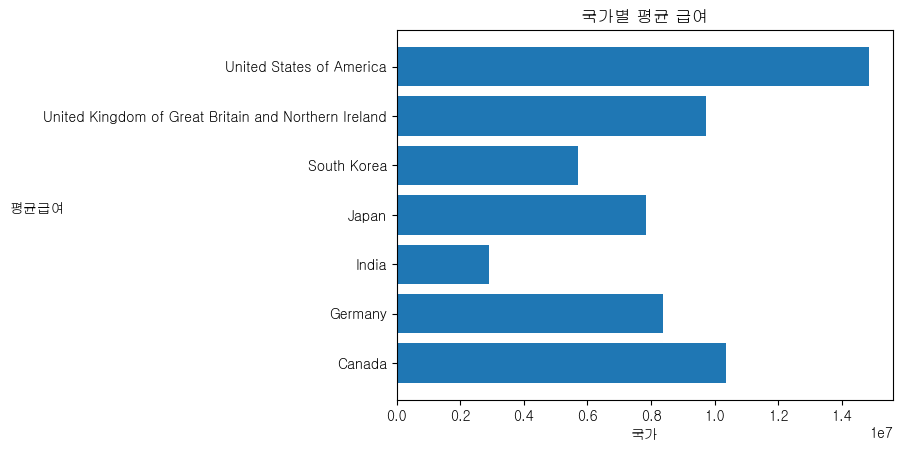

In [26]:
plt.barh(x,y) #bar -> 세로형 막대그래프
plt.title("국가별 평균 급여")
plt.xlabel("국가")
plt.ylabel("평균급여",rotation=0)
plt.xticks(rotation = 0)
plt.show()

<Axes: ylabel='국적'>

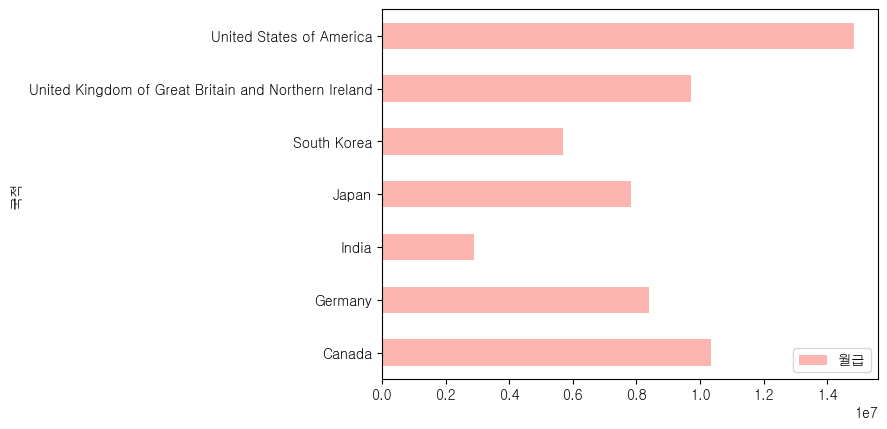

In [29]:
#판다스 내장 시각화 기능활용
country_pay_mean.plot(kind="barh",colormap="Pastel1")
#colormap 속성
# 1.연속형(colormap for continuous data): 연속적인 값에 대해 색상을 지정할 때 사용
# viridis: 퍼지는 색상(보라색 → 노란색), 기본
# plasma: 뜨거운 색상(보라색 → 빨강, 노랑)
# inferno: 더 뜨거운 색상(검정 → 빨강 → 노랑)
# magma: 차가운 색상(검정 → 보라 → 노랑)
# cividis: 시각 장애인을 고려한 색상
# twilight: 흰색과 파란색을 강조하는 색상
# copper: 주로 금속 계열의 색상(갈색 → 금색)
# coolwarm: 파란색에서 빨간색으로 가는 그라데이션
# YlGnBu: 노랑 → 초록 → 파랑 그라데이션
# RdYlBu: 빨강 → 노랑 → 파랑 그라데이션

# 2.범주형(colormap for categorical data): 데이터가 범주형일 때 사용할 수 있는 색상
# Set1, Set2, Set3: 범주형 색상 중에서 자주 사용되는 컬러셋.
# Pastel1, Pastel2: 부드러운 색상셋.
# Paired: 다양한 색이 조화를 이루는 색상셋.
# Dark2: 더 어두운 색상셋.
# Accent: 다채로운 색상셋.

# 3.기타 범주형 색상:
# tab10: 10가지 색상으로 구성된 색상 셋.
# tab20: 20가지 색상으로 구성된 색상 셋.
# Set1: 파스텔 계열의 색상 셋.
# rainbow: 무지개 색상(빨강 → 보라)
# spring: 분홍색에서 노란색으로 변하는 색상.
# summer: 녹색에서 노란색으로 변하는 색상.
# autumn: 빨간색에서 노란색으로 변하는 색상.
# winter: 파란색에서 초록색으로 변하는 색상.

In [34]:
#학력별 평균월급 비교하기
# PhD : 박사, Master : 석사, Undergraduate : 학사, NoHigherEd : 고졸, Other : 해외교육, 검정고시, 비정규교육, 중졸 등
# 학력, 월급 데이터만 가져오기!
grade_pay = data[["학력","월급"]]
grade_pay_mean = grade_pay.groupby(by="학력").mean()
grade_pay_mean

,월급
학력,
Master,1.107697e+07
NoHigherEd,8.838012e+06
Other,1.084932e+07
PhD,1.262739e+07
Undergraduate,1.048826e+07


<Axes: ylabel='학력'>

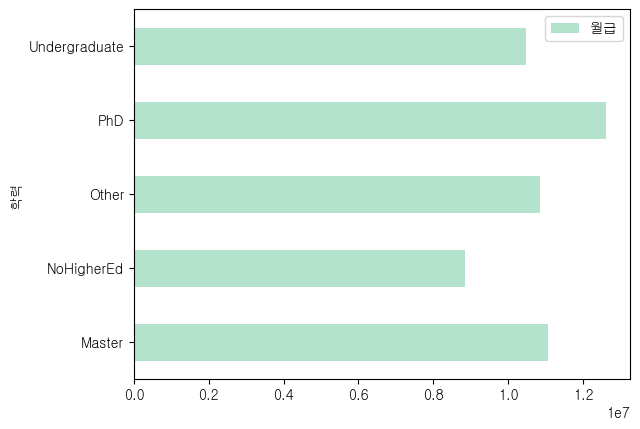

In [37]:
grade_pay_mean.plot(kind = 'barh',colormap = "Pastel2")

In [42]:
#성별 평균월급 비교
# Man, Woman, NonBinary
gender_pay = data[["성별","월급"]]
gender_pay_mean = gender_pay.groupby("성별").mean()
gender_pay_mean

,월급
성별,
Man,1.069805e+07
NonBinary,1.103526e+07
Woman,1.028954e+07


(array([0, 1, 2]),
 [Text(0, 0, 'Man'), Text(1, 0, 'NonBinary'), Text(2, 0, 'Woman')])

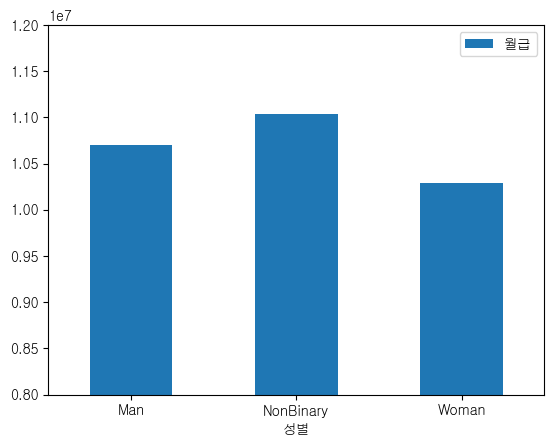

In [45]:
gender_pay_mean.plot(kind="bar")
plt.ylim(0.8e7,1.2e7)
plt.xticks(rotation=0)

<Axes: title={'center': '학력 인원비율'}, ylabel='count'>

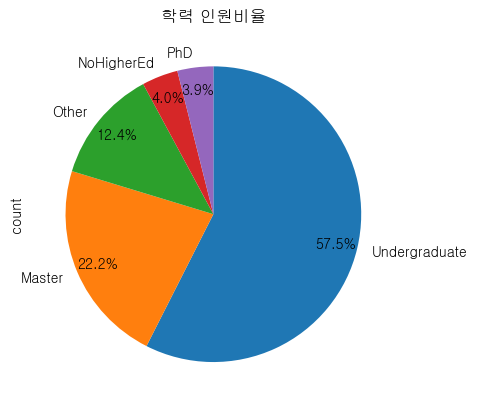

In [53]:
#학력별로 몇퍼센트 인원이 분포되어있는지 살펴볼 수 있는 파이그래프를 그려보자! -> plot()
data['학력'].value_counts().plot(kind='pie',startangle=90,
                              counterclock=False,autopct = "%.1f%%", pctdistance=0.85,title="학력 인원비율")

### 멀티 인덱스
- 2개 이상의 컬럼을 동시에 인덱스로 갖는 경우

In [56]:
#성별 -> 학력 -> 월급
gender_grade = data[["성별","학력","월급"]].groupby(['성별','학력']).mean()
gender_grade

월급
성별        학력                         
Man       Master         1.108608e+07
          NoHigherEd     8.896579e+06
          Other          1.091896e+07
          PhD            1.278265e+07
          Undergraduate  1.048456e+07
NonBinary Master         1.166053e+07
          NoHigherEd     7.913358e+06
          Other          1.001443e+07
          PhD            1.113904e+07
          Undergraduate  1.146045e+07
Woman     Master         1.076345e+07
          NoHigherEd     8.207424e+06
          Other          9.890915e+06
          PhD            1.096452e+07
          Undergraduate  1.019223e+07

### seaborn 라이브러리
- 파이썬의 데이터 시각화 라이브러리, 특히 통계적 그래프를 쉽게 그릴 수 있다.
- matplotlib을 기반으로 하지만 좀 더 간편한 시각화 제공, 사용방법 더 간편

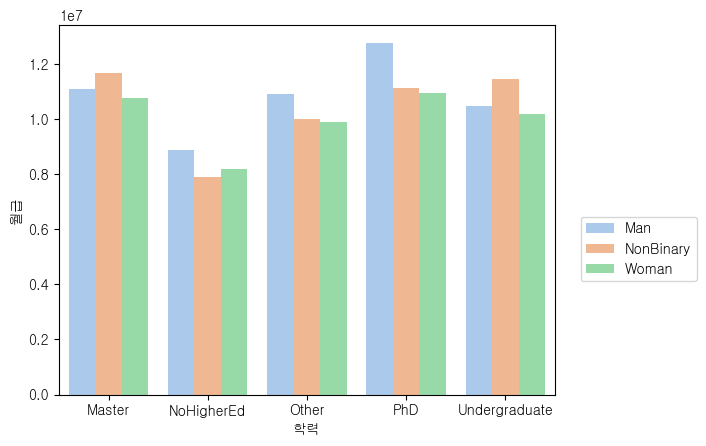

In [64]:
import seaborn as sns
sns.barplot(data=gender_grade, x = "학력", y = "월급", hue = "성별", palette="pastel")
# hue 값에 따라 데이터를 다른 색상으로 구분하여 그릴 수 있다!(색상의 구분 기준)
# palette 속성
# 'magma': 어두운 색에서 밝은 색으로 변하는 색상 조합 (히트맵 등에서 자주 사용)
# 'pastel': 부드럽고 밝은 색
# 'muted': 좀 더 중립적이고 muted한 색상
# 'deep': 강하고 선명한 색상
# 'Set1', 'Set2', 'Set3': 다양한 카테고리별 색상 팔레트
# 'coolwarm': 시원한 색에서 따뜻한 색으로 변화하는 팔레트
# 'Blues', 'Reds', 'Greens': 색상별로 나누어진 팔레트
# 'cubehelix': 흑백 대비가 강조된 색상
plt.legend(loc='upper right',bbox_to_anchor=(1.3,0.5))

In [66]:
#나이, 국적으로 평균 월급 구하기 -> seaborn 시각화하기!
age_country = data[["나이","국적","월급"]].groupby(['나이','국적']).mean()
age_country

월급
나이  국적                                                              
<35 Canada                                              9.433729e+06
    Germany                                             7.333223e+06
    India                                               2.688426e+06
    Japan                                               6.742367e+06
    South Korea                                         4.970957e+06
    United Kingdom of Great Britain and Northern Ir...  8.665066e+06
    United States of America                            1.357940e+07
>35 Canada                                              1.165075e+07
    Germany                                             1.008370e+07
    India                                               5.050042e+06
    Japan                                               9.284709e+06
    South Korea                                         7.797195e+06
    United Kingdom of Great Britain and Northern Ir...  1.109423e+07
    United States of America                            1.636243e+07

<Axes: xlabel='월급', ylabel='국적'>

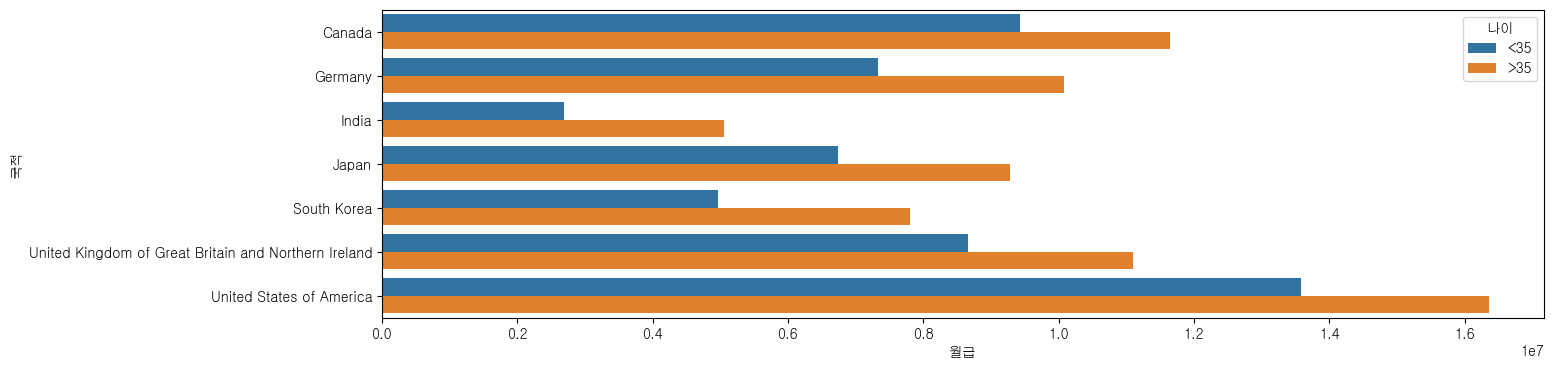

In [68]:
#seaborn라이브러리 활용해서 시각화하기!
plt.figure(figsize=(15,4))
sns.barplot(data=age_country,x="월급",y="국적",hue="나이")

<Axes: xlabel='연차', ylabel='월급'>

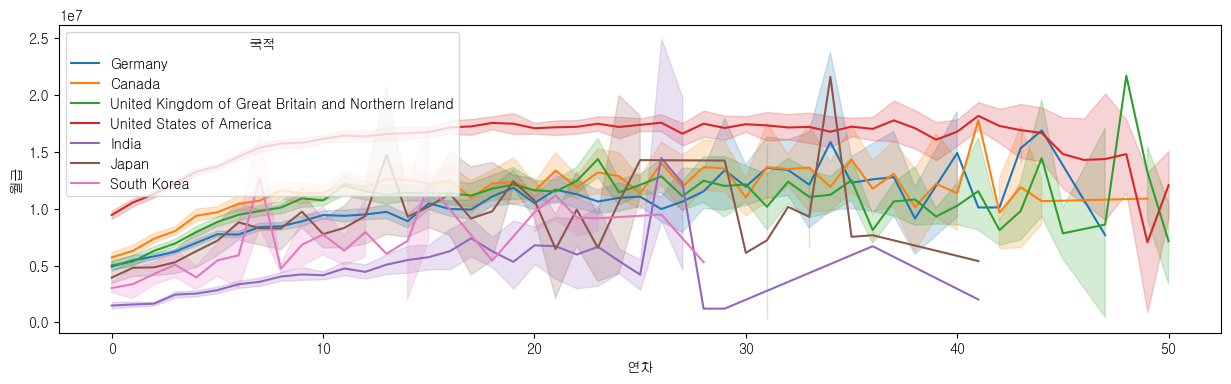

In [69]:
#국적별 연차에 따른 월급 시각화!
plt.figure(figsize=(15,4))
sns.lineplot(data = data, x = "연차", y= "월급", hue= "국적")
#선 뒤에 있는 음영부분은 신뢰구간을 나타낸다 (오차범위)
#신뢰구간은 각 선에 대한 데이터의 변동성이나 불확실성을 나타낸다 -> 월급이 특정연차에서 얼마나 일관성 있는 데이터인지 보여준다!

### 개발자별 보유 스킬 데이터 다루기
- 어떤 스킬을 공부해야 높은 월급을 받을 수 있는 지 살펴보자!

In [4]:
import pandas as pd

In [10]:
data

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9274800.0
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,13,5536200.0
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,17,9339720.0
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,3,8220840.0
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,5,7264200.0
...,...,...,...,...,...,...,...,...,...,...,...
DEV33462,<35,Master,Man,Yes,Dev,7,5,United States of America,94000,5,11280000.0
DEV33463,<35,Undergraduate,Man,No,Dev,7,2,Germany,41058,13,4926960.0
DEV33464,>35,Undergraduate,Man,No,Dev,21,16,United States of America,115000,11,13800000.0


In [9]:
skills = pd.read_csv("data/Developer Skills.csv",encoding= "euc-kr",index_col="일련번호")
skills

,보유기술
일련번호,
DEV1,C;C++;Java;Perl;Ruby;Git;Ruby on Rails
DEV2,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...
DEV3,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...
DEV4,Python;Git;PostgreSQL
DEV5,C;C++;Java;Python;Git
...,...
DEV33462,C;C#;C++;Microsoft Azure;SQLite
DEV33463,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...
DEV33464,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...


In [11]:
skills.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33466 entries, DEV1 to DEV33466
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   보유기술    33438 non-null  object
dtypes: object(1)
memory usage: 522.9+ KB


In [13]:
s = "안;녕;하;세;요"
s.split(";")

['안', '녕', '하', '세', '요']

In [15]:
#보유기술 세미콜론을 이용해서 사람이 임의로 구분자(;)를 넣어준 형태로 이루어져있다!
#보유기술이 하나의 긴 문자열로 보여지고있다! -> 각 기술별로 나눠줄예정!
skill_data = skills["보유기술"].str.split(";")
skill_data

일련번호
DEV1           [C, C++, Java, Perl, Ruby, Git, Ruby on Rails]
DEV2        [Bash/Shell, HTML/CSS, JavaScript, PHP, Ruby, ...
DEV3        [C++, HTML/CSS, Java, JavaScript, Kotlin, Node...
DEV4                                [Python, Git, PostgreSQL]
DEV5                              [C, C++, Java, Python, Git]
                                  ...                        
DEV33462                [C, C#, C++, Microsoft Azure, SQLite]
DEV33463    [C#, HTML/CSS, JavaScript, TypeScript, Docker,...
DEV33464    [C#, HTML/CSS, Java, JavaScript, npm, ASP.NET ...
DEV33465    [C#, HTML/CSS, JavaScript, SQL, TypeScript, np...
DEV33466                                     [Python, Docker]
Name: 보유기술, Length: 33466, dtype: object

In [18]:
#skill_data -> 리스트 형태의 데이터가 삽입되어있음 -> 리스트 형태의 데이터를 다수의 행으로 증식시켜줄거다!
#explode() -> 리스트 안에 요소 갯수만큼 행이 증식됨!
explode_skill = skill_data.explode()
explode_skill

일련번호
DEV1                           C
DEV1                         C++
DEV1                        Java
DEV1                        Perl
DEV1                        Ruby
                    ...         
DEV33465                DynamoDB
DEV33465    Microsoft SQL Server
DEV33465                  SQLite
DEV33466                  Python
DEV33466                  Docker
Name: 보유기술, Length: 442784, dtype: object

### 데이터 병합
- merge함수 활용
- 공통된 컬럼을 기준으로 두개의 데이터를 병합할 때 활용!
- inner, outer, left, right
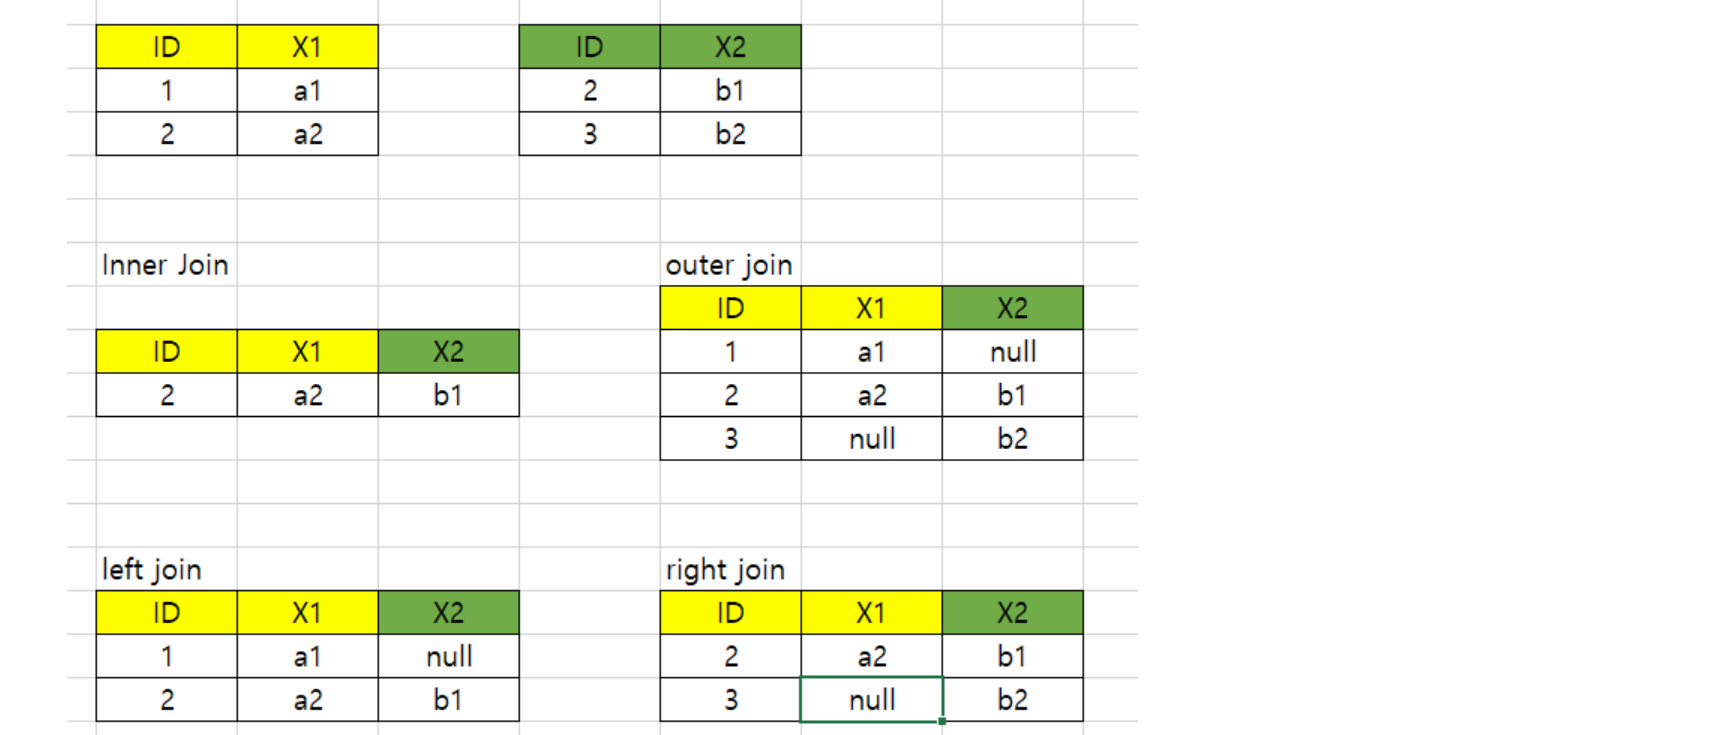

In [19]:
#보유기술에 따른 월급을 확인하기위해 데이터 병합!
full_data = pd.merge(explode_skill,data,how="inner",on="일련번호")
full_data

,보유기술,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,,
DEV1,C,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9274800.0
DEV1,C++,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9274800.0
DEV1,Java,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9274800.0
DEV1,Perl,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9274800.0
DEV1,Ruby,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9274800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
DEV33465,DynamoDB,<35,Undergraduate,Man,Yes,Dev,5,1,United States of America,70000,15,8400000.0
DEV33465,Microsoft SQL Server,<35,Undergraduate,Man,Yes,Dev,5,1,United States of America,70000,15,8400000.0
DEV33465,SQLite,<35,Undergraduate,Man,Yes,Dev,5,1,United States of America,70000,15,8400000.0


In [20]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442784 entries, DEV1 to DEV33466
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   보유기술    442756 non-null  object 
 1   나이      442784 non-null  object 
 2   학력      442784 non-null  object 
 3   성별      442784 non-null  object 
 4   정신건강    442784 non-null  object 
 5   전문직     442784 non-null  object 
 6   개발공부기간  442784 non-null  int64  
 7   연차      442784 non-null  int64  
 8   국적      442784 non-null  object 
 9   연봉      442784 non-null  int64  
 10  보유기술개수  442784 non-null  int64  
 11  월급      442784 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 43.9+ MB


In [22]:
#결측치 데이터 조회
full_data[full_data["보유기술"].isnull()]

,보유기술,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,,
DEV1257,NaN,>35,Other,Man,No,Dev,7,6,United States of America,85000,0,10200000.0
DEV1303,NaN,>35,PhD,Man,No,NotDev,37,0,Germany,76020,0,9122400.0
DEV3053,NaN,<35,Undergraduate,Man,No,Dev,8,4,India,70368,0,8444160.0
DEV3610,NaN,<35,Master,Man,No,Dev,11,3,United Kingdom of Great Britain and Northern I...,43686,0,5242320.0
DEV5301,NaN,<35,Master,Man,No,Dev,6,4,United States of America,82000,0,9840000.0
DEV5465,NaN,<35,Undergraduate,Woman,No,Dev,12,8,United States of America,145000,0,17400000.0
DEV5825,NaN,<35,Undergraduate,Man,No,Dev,3,2,India,10052,0,1206240.0
DEV7062,NaN,>35,Other,Man,No,Dev,35,30,United States of America,130000,0,15600000.0
DEV8183,NaN,>35,Other,Man,Yes,NotDev,33,18,United States of America,74089,0,8890680.0


In [24]:
#결측치를 "없음" 문자열로 채워주기!
full_data["보유기술"] = full_data["보유기술"].fillna("없음")

In [25]:
full_data[full_data["보유기술"].isnull()]
#결측치 처리 완료!

,보유기술,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,,


### 보유기술 및 연차에 따른 급여를 시각화하자!

In [27]:
#보유기술 목록을 살펴보자!
full_data["보유기술"].unique()

array(['C', 'C++', 'Java', 'Perl', 'Ruby', 'Git', 'Ruby on Rails',
       'Bash/Shell', 'HTML/CSS', 'JavaScript', 'PHP', 'SQL', 'jQuery',
       'Laravel', 'AWS', 'MySQL', 'PostgreSQL', 'Kotlin', 'Node.js',
       'TypeScript', 'Docker', 'Kubernetes', 'Angular', 'Express',
       'Spring', 'Heroku', 'DynamoDB', 'Python', 'Assembly', 'Rust',
       'Ansible', 'Terraform', 'Yarn', 'React.js', 'SQLite', 'C#', 'VBA',
       'ASP.NET', 'Microsoft SQL Server', 'Gatsby', 'R', 'Flask',
       'ASP.NET Core ', 'Microsoft Azure', 'Elasticsearch', 'Julia',
       'Matlab', 'Google Cloud Platform', 'Clojure', 'Go', 'Angular.js',
       'MariaDB', 'MongoDB', 'Dart', 'PowerShell', 'Xamarin', 'Couchbase',
       'Redis', 'Vue.js', 'Chef', 'Unity 3D', 'Django', 'F#', 'Scala',
       'Unreal Engine', 'FastAPI', 'Firebase', 'DigitalOcean',
       'Objective-C', 'Swift', 'Symfony', 'IBM Cloud or Watson', 'Oracle',
       'Groovy', 'IBM DB2', 'Puppet', 'Cassandra', 'LISP', 'Delphi',
       'APL', 'Erlang'

In [28]:
# Front => HTML/CSS, JavaScript
# Back => Java, Spring
# 국내에서 프론트엔드 연봉이 낮다라고한다! -> 진짜인가? 사실확인해보기
korea_dev = full_data[full_data["국적"] == 'South Korea']
korea_dev

,보유기술,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,,
DEV346,C++,<35,Master,Man,No,Dev,10,5,South Korea,40248,8,4829760.0
DEV346,HTML/CSS,<35,Master,Man,No,Dev,10,5,South Korea,40248,8,4829760.0
DEV346,JavaScript,<35,Master,Man,No,Dev,10,5,South Korea,40248,8,4829760.0
DEV346,Node.js,<35,Master,Man,No,Dev,10,5,South Korea,40248,8,4829760.0
DEV346,Git,<35,Master,Man,No,Dev,10,5,South Korea,40248,8,4829760.0
...,...,...,...,...,...,...,...,...,...,...,...,...
DEV33264,MongoDB,<35,Undergraduate,Man,No,Dev,15,7,South Korea,43535,32,5224200.0
DEV33264,MySQL,<35,Undergraduate,Man,No,Dev,15,7,South Korea,43535,32,5224200.0
DEV33264,PostgreSQL,<35,Undergraduate,Man,No,Dev,15,7,South Korea,43535,32,5224200.0


In [29]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Gulim"

In [36]:
korea_dev

,보유기술,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,,
DEV346,C++,<35,Master,Man,No,Dev,10,5,South Korea,40248,8,4829760.0
DEV346,HTML/CSS,<35,Master,Man,No,Dev,10,5,South Korea,40248,8,4829760.0
DEV346,JavaScript,<35,Master,Man,No,Dev,10,5,South Korea,40248,8,4829760.0
DEV346,Node.js,<35,Master,Man,No,Dev,10,5,South Korea,40248,8,4829760.0
DEV346,Git,<35,Master,Man,No,Dev,10,5,South Korea,40248,8,4829760.0
...,...,...,...,...,...,...,...,...,...,...,...,...
DEV33264,MongoDB,<35,Undergraduate,Man,No,Dev,15,7,South Korea,43535,32,5224200.0
DEV33264,MySQL,<35,Undergraduate,Man,No,Dev,15,7,South Korea,43535,32,5224200.0
DEV33264,PostgreSQL,<35,Undergraduate,Man,No,Dev,15,7,South Korea,43535,32,5224200.0


In [34]:
#월급, 보유기술 데이터를 보고 보유기술을 기준으로 과연 프론트가 평균월급이 낮은가?
#시각화까지!
front_back = korea_dev[["월급","보유기술"]].groupby("보유기술").mean().astype(int).loc[["HTML/CSS", "JavaScript","Java", "Spring"]]
front_back

,월급
보유기술,
HTML/CSS,5116106
JavaScript,5589705
Java,5951689
Spring,5705095


<Axes: ylabel='보유기술'>

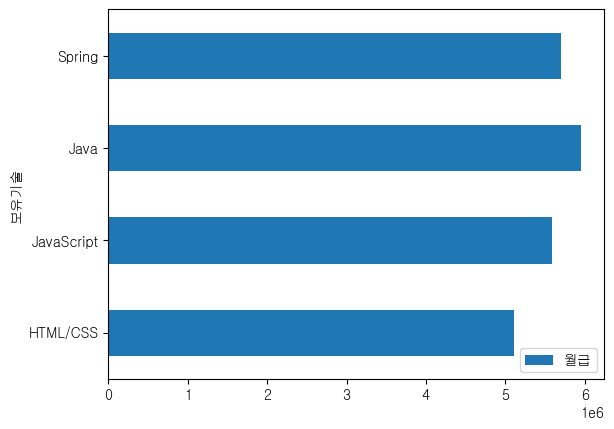

In [35]:
#시각화까지!
front_back.plot(kind="barh")

In [38]:
#35세 미만, 3년차 이하에 대한 데이터!
junior_dev = korea_dev[(korea_dev["나이"] == '<35') & (korea_dev["연차"] <= 3)]
junior_dev

,보유기술,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,,
DEV2393,C#,<35,NoHigherEd,Man,No,Dev,4,1,South Korea,20121,9,2414520.0
DEV2393,Git,<35,NoHigherEd,Man,No,Dev,4,1,South Korea,20121,9,2414520.0
DEV2393,Xamarin,<35,NoHigherEd,Man,No,Dev,4,1,South Korea,20121,9,2414520.0
DEV2393,ASP.NET,<35,NoHigherEd,Man,No,Dev,4,1,South Korea,20121,9,2414520.0
DEV2393,ASP.NET Core,<35,NoHigherEd,Man,No,Dev,4,1,South Korea,20121,9,2414520.0
...,...,...,...,...,...,...,...,...,...,...,...,...
DEV33121,npm,<35,Undergraduate,Man,No,Dev,4,0,South Korea,39577,9,4749240.0
DEV33121,Node.js,<35,Undergraduate,Man,No,Dev,4,0,South Korea,39577,9,4749240.0
DEV33121,React.js,<35,Undergraduate,Man,No,Dev,4,0,South Korea,39577,9,4749240.0


In [40]:
#시각화하기!
junior_pay = junior_dev[["보유기술","월급"]].groupby("보유기술").mean().astype(int).loc[["HTML/CSS", "JavaScript","Java", "Spring"]]

<Axes: ylabel='보유기술'>

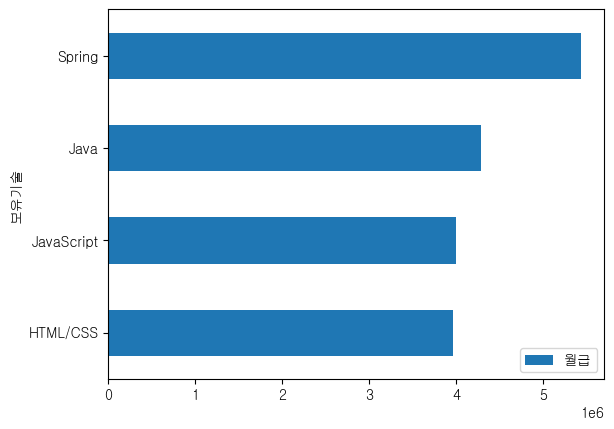

In [41]:
junior_pay.plot(kind='barh')

In [42]:
import seaborn as sns

<Axes: xlabel='보유기술', ylabel='월급'>

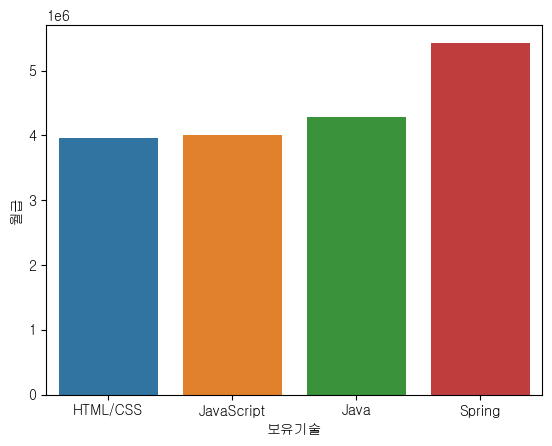

In [43]:
sns.barplot(data=junior_pay, x = "보유기술",y = "월급", hue="보유기술")

In [45]:
#상관계수 분석
#corr 함수
full_data.corr(numeric_only=True)

,개발공부기간,연차,연봉,보유기술개수,월급
개발공부기간,1.000000,0.900152,0.375811,0.015856,0.375811
연차,0.900152,1.000000,0.398403,0.012139,0.398403
연봉,0.375811,0.398403,1.000000,0.059573,1.000000
보유기술개수,0.015856,0.012139,0.059573,1.000000,0.059573
월급,0.375811,0.398403,1.000000,0.059573,1.000000


<Axes: >

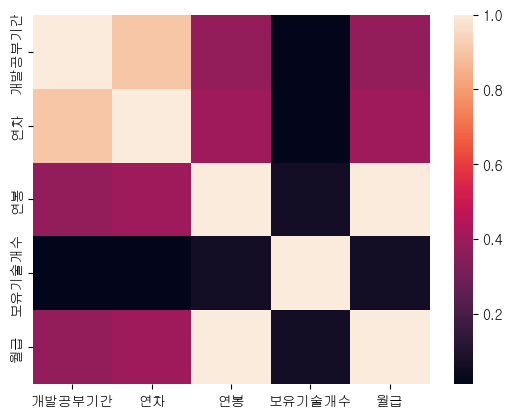

In [46]:
sns.heatmap(full_data.corr(numeric_only=True))